In [158]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 19 17:50:38 2018

@author: ohmgs
"""

from bs4 import BeautifulSoup
import requests
import time
import json

def get_soup_of_page(page_num):
    url = "https://movie.naver.com/movie/point/af/list.nhn?target=after&page=%d"
    return BeautifulSoup(requests.get(url % page_num).text, features='lxml')

In [159]:
def get_parsed_data_of_page(page_num):
    soup = get_soup_of_page(page_num)
    ids = [int(x.text) for x in soup.select('.ac.num')]
    ratings = [int(x.text) for x in soup.select('.point')]
    div_titles = soup.select('.title')
    titles = []
    reviews = []
    for div_title in div_titles:
        elems = [elem for elem in list(div_title.children) if elem != '\n']
        try:
            titles.append(elems[0].text.strip())
        except Exception:
            print("exception found: maybe title is empty?")
            titles.append('')
        try:    
            reviews.append(elems[2].strip())
        except Exception:
            print("exception found: maybe review is empty?")
            reviews.append('')
        
    naver_movie_reviews = {}
    for rating_id, rating, title, review in zip(ids, ratings, titles, reviews):
        naver_movie_reviews[rating_id] = {
                "rating": rating,
                "title": title,
                "review": review
            }
    
    return naver_movie_reviews

In [160]:
def collect_reviews(num_review):
    merged_data = {}
    collision_count = 0
    for page_num in range(1, 100000):
        try:
            parsed_data = get_parsed_data_of_page(page_num)
            for rating_id, review_data in parsed_data.items():
                if rating_id in merged_data:
                    collision_count += 1
                    print('{cnt}-th collision detected!'.format(cnt=collision_count))
                merged_data[rating_id] = review_data
            
            print("{i}-th crawl: {length} data entries are collected".format(i=page_num, length=len(merged_data)))
        except Exception as e:
            print("{i}-th crawl is skipped due to an exception: {error}".format(i=page_num, error=e))
        if len(merged_data) >= num_review:
            break
        time.sleep(5)
    return merged_data

num_review = int(input("enter the number of reviews you want to collect: "))
collected = collect_reviews(num_review)

with open("collected_movie_reviews.txt", "w") as f:
    f.write(json.dumps(collected, indent=4))

enter the number of reviews you want to collect: 9220
1-th crawl: 10 data entries are collected
1-th collision detected!
2-th crawl: 19 data entries are collected
2-th collision detected!
3-th crawl: 28 data entries are collected
3-th collision detected!
4-th crawl: 37 data entries are collected
4-th collision detected!
5-th crawl: 46 data entries are collected
6-th crawl: 56 data entries are collected
7-th crawl: 66 data entries are collected
5-th collision detected!
8-th crawl: 75 data entries are collected
6-th collision detected!
9-th crawl: 84 data entries are collected
10-th crawl: 94 data entries are collected
7-th collision detected!
11-th crawl: 103 data entries are collected
12-th crawl: 113 data entries are collected
8-th collision detected!
13-th crawl: 122 data entries are collected
9-th collision detected!
14-th crawl: 131 data entries are collected
10-th collision detected!
15-th crawl: 140 data entries are collected
16-th crawl: 150 data entries are collected
11-th coll

151-th crawl: 1453 data entries are collected
152-th crawl: 1463 data entries are collected
153-th crawl: 1473 data entries are collected
58-th collision detected!
154-th crawl: 1482 data entries are collected
155-th crawl: 1492 data entries are collected
156-th crawl: 1502 data entries are collected
59-th collision detected!
157-th crawl: 1511 data entries are collected
158-th crawl: 1521 data entries are collected
159-th crawl: 1531 data entries are collected
160-th crawl: 1541 data entries are collected
161-th crawl: 1551 data entries are collected
162-th crawl: 1561 data entries are collected
60-th collision detected!
163-th crawl: 1570 data entries are collected
164-th crawl: 1580 data entries are collected
61-th collision detected!
165-th crawl: 1589 data entries are collected
166-th crawl: 1599 data entries are collected
62-th collision detected!
167-th crawl: 1608 data entries are collected
63-th collision detected!
64-th collision detected!
168-th crawl: 1616 data entries are 

296-th crawl: 2846 data entries are collected
297-th crawl: 2856 data entries are collected
298-th crawl: 2866 data entries are collected
115-th collision detected!
299-th crawl: 2875 data entries are collected
116-th collision detected!
300-th crawl: 2884 data entries are collected
301-th crawl: 2894 data entries are collected
302-th crawl: 2904 data entries are collected
303-th crawl: 2914 data entries are collected
304-th crawl: 2924 data entries are collected
305-th crawl: 2934 data entries are collected
306-th crawl: 2944 data entries are collected
307-th crawl: 2954 data entries are collected
117-th collision detected!
118-th collision detected!
308-th crawl: 2962 data entries are collected
119-th collision detected!
120-th collision detected!
309-th crawl: 2970 data entries are collected
310-th crawl: 2980 data entries are collected
121-th collision detected!
311-th crawl: 2989 data entries are collected
122-th collision detected!
312-th crawl: 2998 data entries are collected
12

173-th collision detected!
441-th crawl: 4237 data entries are collected
442-th crawl: 4247 data entries are collected
443-th crawl: 4257 data entries are collected
444-th crawl: 4267 data entries are collected
445-th crawl: 4277 data entries are collected
446-th crawl: 4287 data entries are collected
447-th crawl: 4297 data entries are collected
448-th crawl: 4307 data entries are collected
174-th collision detected!
449-th crawl: 4316 data entries are collected
450-th crawl: 4326 data entries are collected
451-th crawl: 4336 data entries are collected
452-th crawl: 4346 data entries are collected
453-th crawl: 4356 data entries are collected
454-th crawl: 4366 data entries are collected
175-th collision detected!
455-th crawl: 4375 data entries are collected
456-th crawl: 4385 data entries are collected
457-th crawl: 4395 data entries are collected
176-th collision detected!
458-th crawl: 4404 data entries are collected
177-th collision detected!
459-th crawl: 4413 data entries are c

588-th crawl: 5655 data entries are collected
589-th crawl: 5665 data entries are collected
590-th crawl: 5675 data entries are collected
226-th collision detected!
227-th collision detected!
591-th crawl: 5683 data entries are collected
592-th crawl: 5693 data entries are collected
228-th collision detected!
593-th crawl: 5702 data entries are collected
229-th collision detected!
594-th crawl: 5711 data entries are collected
230-th collision detected!
595-th crawl: 5720 data entries are collected
231-th collision detected!
596-th crawl: 5729 data entries are collected
597-th crawl: 5739 data entries are collected
598-th crawl: 5749 data entries are collected
599-th crawl: 5759 data entries are collected
232-th collision detected!
600-th crawl: 5768 data entries are collected
601-th crawl: 5778 data entries are collected
602-th crawl: 5788 data entries are collected
233-th collision detected!
603-th crawl: 5797 data entries are collected
604-th crawl: 5807 data entries are collected
60

737-th crawl: 7094 data entries are collected
276-th collision detected!
277-th collision detected!
738-th crawl: 7102 data entries are collected
739-th crawl: 7112 data entries are collected
278-th collision detected!
740-th crawl: 7121 data entries are collected
741-th crawl: 7131 data entries are collected
742-th crawl: 7141 data entries are collected
743-th crawl: 7151 data entries are collected
744-th crawl: 7161 data entries are collected
745-th crawl: 7171 data entries are collected
746-th crawl: 7181 data entries are collected
279-th collision detected!
747-th crawl: 7190 data entries are collected
748-th crawl: 7200 data entries are collected
749-th crawl: 7210 data entries are collected
750-th crawl: 7220 data entries are collected
751-th crawl: 7230 data entries are collected
752-th crawl: 7240 data entries are collected
280-th collision detected!
753-th crawl: 7249 data entries are collected
754-th crawl: 7259 data entries are collected
755-th crawl: 7269 data entries are c

317-th collision detected!
891-th crawl: 8592 data entries are collected
892-th crawl: 8602 data entries are collected
893-th crawl: 8612 data entries are collected
318-th collision detected!
894-th crawl: 8621 data entries are collected
895-th crawl: 8631 data entries are collected
896-th crawl: 8641 data entries are collected
897-th crawl: 8651 data entries are collected
898-th crawl: 8661 data entries are collected
899-th crawl: 8671 data entries are collected
319-th collision detected!
900-th crawl: 8680 data entries are collected
320-th collision detected!
901-th crawl: 8689 data entries are collected
321-th collision detected!
902-th crawl: 8698 data entries are collected
903-th crawl: 8708 data entries are collected
904-th crawl: 8718 data entries are collected
322-th collision detected!
905-th crawl: 8727 data entries are collected
906-th crawl: 8737 data entries are collected
907-th crawl: 8747 data entries are collected
323-th collision detected!
908-th crawl: 8756 data entri

In [167]:
"""
Created on Mon Nov 19 17:50:38 2018

@author: ohmgs
"""
# Prep
import json
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Komoran
from konlpy.tag import Okt
from time import time
import pickle
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

with open('./collected_movie_reviews.txt') as data_file:
    data = json.load(data_file)

L = list(data.values())
print(L[0])

{'review': '끝나고 나서도 여운이 가시질 않는다ㅠㅠ', 'rating': 10, 'title': '호두까기 인형과 4개의 왕국'}


In [168]:
print(L[2])
print(len(L))

{'review': '?? 브루스 윌리스 선천적 대머리는 아니였나봐요?', 'rating': 6, 'title': '마지막 보이 스카웃'}
9228


In [169]:
# 리뷰와 평점에 대한 데이터를 데이터프레임에 저장
df_movie = pd.DataFrame({
    "rating" : [ L[i]['rating'] for i in range(len(data))],
    "review" : [ L[i]['review'] for i in range(len(data))],
})

# 평점을 Negative(0), Neutral(4-8), Positive(8-10) 로 나누고, class 라는 column으로 데이터프레임에 저장
emotion_class = ["POS" if df_movie.iloc[i]['rating'] >= 8
                 else
                 "NEU" if df_movie.iloc[i]['rating'] >= 4
                 else
                 "NEG"
                 for i in range(df_movie.shape[0])]
df_movie["class"] = emotion_class

# 피클로 저장하기
df_movie.to_pickle("./df_movie_review.pkl")
df_movie = pd.read_pickle("./df_movie_review.pkl")    

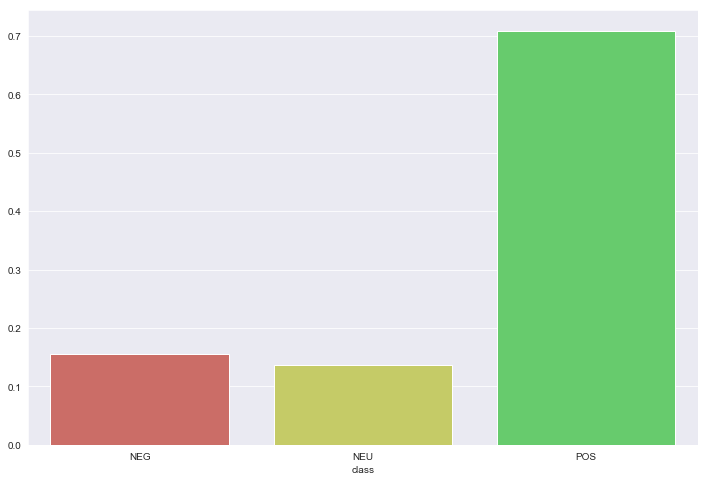

In [170]:
dist = df_movie.groupby(["class"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

In [171]:
twitter = Okt()
def tokenizer_twitter_morphs(doc):
    return twitter.morphs(doc)

def tokenizer_twitter_noun(doc):
    return twitter.nouns(doc)

def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem=True)
    
    
komoran = Komoran()
def tokenizer_noun(doc):
    return komoran.nouns(doc)

def tokenizer_morphs(doc):
    return komoran.morphs(doc)


In [172]:
# Tokenized review 도 데이터프레임에 추가
df_movie['token_review'] = df_movie['review'].apply(tokenizer_twitter_morphs)

# Stop words 정의하기
stop_words = """. 으로 이 에 가 을 는 은 다 이다 게 돼 있지 없지 에서 입니다 ,, 였고 않는 하고 같아요 였다 때문 하는 명의 왔습니다 으로서
 이렇게 그렇게 저렇게 그런 그래도 된다 번은 에선 가면 뭔가 하시는데 싶게 이라 줍니다 봤는데 이제 이었어요 었어요
 크히히 나니 있는 라고 이었습니다 이런게 하며 아니라며 웬만하면 있네요 였습니다 로다 이라는 할만큼 이라 해서 하고 
 사 고 하라 하기 주는 보니 하게 까지 해서인지 였네요 에게 에 게 ~ ~~ ~~~ 하며 하고 했네 ...? ..? ....? 라니 더니
 그냥 없다 있다 하면 엇 급 진심 따름 이나 그리고 도 나 너 우리 ! !! !!! ? 함 임 거 겠죠 더 였어요 의 ~ 이런 저런 는데 됐 없는 수 
 한당 들
"""
stop_words=stop_words.split()

# Preprocessing/filtering function
def filtering_function(token_list):
    result = []
    for e in token_list:
        if e not in stop_words and len(e) >= 2:
            result.append(e)
    return result

# Token_review 를 filtering_function 이용하여 필터링
df_movie["token_review"] = df_movie["token_review"].apply(filtering_function)
# filtering function
# input: token list
# output: filtered token list

# 전체 데이터프레임 Top 10 출력    
print(df_movie.head())    

# 문장 단위의 토큰을 하나의 리스트로 모아서 모든 리뷰의 문장의 토큰을 확인
tokens = [ t for d in df_movie['token_review'] for t in d if t not in stop_words and len(t) >= 2]
print(tokens[:20])
print(len(tokens))

# 토큰 데이터를 nltk.Text로 묶는다.
text = nltk.Text(tokens, name = 'NMSC')
print("=================Number of Tokens=============")
print(len(text.tokens))
print("\n")
# set 으로 묶음으로서 중복 제거한 토큰의 갯수
print("===============Number of Unique Tokens===========")
print(len(set(text.tokens)))
print("\n")
# 가장 많이 나온 Top 10개의 토큰
print("==================Top 10 Token==================")
print(text.vocab().most_common(10))
print("\n")

# 가장 적게 나온 하위 10개의 토큰
print("=======+==Top 10 Token from the bottom==+=======")
print(text.vocab().most_common()[:-20:-1])
print("\n")

   rating                                             review class  \
0      10                              끝나고 나서도 여운이 가시질 않는다ㅠㅠ   POS   
1      10                                    너무 너무 재미있었어요 강추   POS   
2       6                        ?? 브루스 윌리스 선천적 대머리는 아니였나봐요?   NEU   
3      10                                    잘 만든 영화인 것 같아요~   POS   
4      10  유기견들을데리고 CG안하고 찍은점과 촬영후 250마리의 모든 유기견들의 가족을찾아준...   POS   

                                        token_review  
0                       [끝나고, 나서도, 여운, 가시질, 않는다, ㅠㅠ]  
1                               [너무, 너무, 재미있었어요, 강추]  
2                  [??, 브루스, 윌리스, 선천, 대머리, 아니였나, 봐요]  
3                                          [만든, 영화인]  
4  [유기견, 데리, CG, 찍은, 촬영, 250, 마리, 모든, 유기견, 가족, 찾아...  
['끝나고', '나서도', '여운', '가시질', '않는다', 'ㅠㅠ', '너무', '너무', '재미있었어요', '강추', '??', '브루스', '윌리스', '선천', '대머리', '아니였나', '봐요', '만든', '영화인', '유기견']
87206
=================Number of Tokens=============
87206


===============Number of Unique Tokens===========
18

Mean 39.40 words (32.010275)


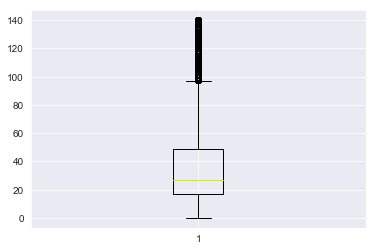

In [173]:
import numpy
from matplotlib import pyplot
# 각 Token의 갯수의 평균/분포
result = [len(token) for token in tokens]
# Tokenized 된 각각의 리뷰를 띄어쓰기 조인한 갯수
result = [len(' '.join(token)) for token in df_movie["token_review"]]
# 오리지날 리뷰의 단어 갯수 (tokenization 전)
result = [len(token) for token in df_movie["review"]]

print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

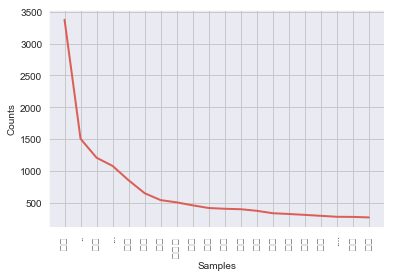

In [174]:
sns.set_style("darkgrid")
sns.set_palette('hls')
text.plot(20)

In [175]:
#TfidfVectorizer usage example

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
     'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer(max_features=5, analyzer='word', stop_words=['the', 'and'])
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X) # len(corpus) X len(tokens)

#    1 2 3 6 8 -> document first is the this -> this is the first document

['document', 'first', 'is', 'one', 'this']
  (0, 4)	0.41599287732132745
  (0, 2)	0.41599287732132745
  (0, 1)	0.6284926983612038
  (0, 0)	0.5088190052882249
  (1, 4)	0.35390037003624897
  (1, 2)	0.35390037003624897
  (1, 0)	0.865741910835101
  (2, 4)	0.41988017955138635
  (2, 2)	0.41988017955138635
  (2, 3)	0.8046124965719778
  (3, 4)	0.41599287732132745
  (3, 2)	0.41599287732132745
  (3, 1)	0.6284926983612038
  (3, 0)	0.5088190052882249


## Define stop words and vectorizer

In [177]:
# Define Stop words 
stop_words = ". , 으로 헐 헉 이 에 가 을 는 은 다 이다 게 돼 있지 없지 에서 입니다 ; ,, ,,, 였고 않는 하고 같아요 였다 때문 하는 명의 왔습니다 으로서 이렇게 그렇게 저렇게 그런 그래도 된다 번은 에선 가면 뭔가 하시는데 싶게 이라 줍니다 봤는데 이제 이었어요 었어요 크히히 나니 있는 라고 이었습니다 이런게 하며 아니라며 웬만하면 있네요 였습니다 로다 이라는 할만큼 이라 해서 하고 사고 하라 하기 .... 주는 보니 하게 까지 해서인지 였네요 에게 에 게 ~ ~~ ~~~ 하며 하고 했네 ...? ..? ....? 라니 더니 그냥 없다 있다 하면 엇 급 진심 따름 이나 그리고 도 나 너 우리 ! !! !!! ? 함 임 거 겠죠 더 였어요 의 ~ 이런 저런 는데 됐 없는 수 한당 들"
stop_words=stop_words.split(' ')

# Convert a collection of raw documents to a matrix of TF-IDF features.
vectorizer = TfidfVectorizer(max_features=300, analyzer='word', stop_words=stop_words, tokenizer=tokenizer_twitter_morphs)
#X = vectorizer.fit_transform(df_movie["review"])
#print(vectorizer.get_feature_names())

## Classifiers with accuracy scores

### Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

lr_tfidf = Pipeline([('vect', vectorizer), ('classifier', LogisticRegression(C=10.0, penalty='l2', random_state=0, solver='lbfgs', multi_class='auto'))])

# Split train and test data
num_data = len(df_movie)
num_train = int(num_data * 0.8)
num_valid = int(num_data * 0.1)
num_test = num_data - num_train - num_valid

X_train, y_train = df_movie["review"][:num_train], df_movie["class"][:num_train]
X_valid, y_valid = df_movie["review"][num_train:num_train+num_valid], df_movie["class"][num_train:num_train+num_valid]
X_test, y_test = df_movie["review"][num_train+num_valid:], df_movie["class"][num_train+num_valid:]


lr_tfidf.fit(X_train, y_train)
y_pred = lr_tfidf.predict(X_valid)
print('first classifier:', accuracy_score(y_valid, y_pred))
print('all POS classifier:', accuracy_score(y_valid, ['POS'] * num_valid))
print('all NEU classifier:', accuracy_score(y_valid, ['NEU'] * num_valid))
print('all NEG classifier:', accuracy_score(y_valid, ['NEG'] * num_valid))

C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


first classifier: 0.7310195227765727
all POS classifier: 0.6908893709327549
all NEU classifier: 0.1420824295010846
all NEG classifier: 0.16702819956616052


### Naive Bayes 

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The movie review ratings are composed of intergers, so it would be suitable to use the multinomial Naive Bayes classifier to evaluate the accuracy. The multinomial distribution normally requires integer feature counts.

In [179]:
# We will use Multinominal Naive Bayes as our model
from sklearn.naive_bayes import MultinomialNB

In [180]:
# Train a Multimoda Naive Bayes classifier

nb_clf = Pipeline([('vect', vectorizer), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_valid)
print('first classifier:', accuracy_score(y_valid, y_pred))

first classifier: 0.7331887201735358


In [181]:
print('all POS classifier:', accuracy_score(y_valid, ['POS'] * num_valid))
print('all NEU classifier:', accuracy_score(y_valid, ['NEU'] * num_valid))
print('all NEG classifier:', accuracy_score(y_valid, ['NEG'] * num_valid))

all POS classifier: 0.6908893709327549
all NEU classifier: 0.1420824295010846
all NEG classifier: 0.16702819956616052


### SGC(Stochastic Gradient Descent)

In [200]:
from sklearn.linear_model import SGDClassifier

sgc_clf = Pipeline([('vect', vectorizer), ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42))])
sgc_clf.fit(X_train, y_train)
y_pred = sgc_clf.predict(X_valid)
print('first classifier:', accuracy_score(y_valid, y_pred))
print('all POS classifier:', accuracy_score(y_valid, ['POS'] * num_valid))
print('all NEU classifier:', accuracy_score(y_valid, ['NEU'] * num_valid))
print('all NEG classifier:', accuracy_score(y_valid, ['NEG'] * num_valid))

C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


first classifier: 0.720173535791757
all POS classifier: 0.6908893709327549
all NEU classifier: 0.1420824295010846
all NEG classifier: 0.16702819956616052


Regardless of the classifiers, we can note that the accuracy scores of positive ratings of the movie reviews are much higher than the neutral and negative ratings. This observation may indicate that the classifiers work better on predicting positive ratings..?

### Logistic Regression and Ridge Classifier

In [196]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingRegressor

classifiers = [
    ('Logistic Regression', LogisticRegression(penalty='l2', random_state=0, solver='lbfgs', multi_class='auto')),
    ('Ridge Regression', RidgeClassifier()),
    
]

for classifier_name, classifier in classifiers:
    clf_tfidf = Pipeline([('vect', vectorizer), ('clf', classifier)])
    clf_tfidf.fit(X_train, y_train)
    acc_train = accuracy_score(clf_tfidf.predict(X_train), y_train)
    y_pred = clf_tfidf.predict(X_valid)
    print(classifier_name, acc_train, accuracy_score(y_valid, y_pred))

Logistic Regression 0.7730967217556218 0.737527114967462
Ridge Regression 0.7680845299376863 0.7429501084598699


In [185]:
print(classifiers[0][1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [186]:
print(classifiers[1][1])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)


#### Ridge Regression Accuracy

In [198]:
rg_tfidf = Pipeline([('vect', vectorizer), ('classifier', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001))])


In [199]:
rg_tfidf.fit(X_train, y_train)
y_pred = rg_tfidf.predict(X_valid)
print('first classifier:', accuracy_score(y_valid, y_pred))
print('all POS classifier:', accuracy_score(y_valid, ['POS'] * num_valid))
print('all NEU classifier:', accuracy_score(y_valid, ['NEU'] * num_valid))
print('all NEG classifier:', accuracy_score(y_valid, ['NEG'] * num_valid))

first classifier: 0.7429501084598699
all POS classifier: 0.6908893709327549
all NEU classifier: 0.1420824295010846
all NEG classifier: 0.16702819956616052


## CNN

In [187]:
import re
import csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import callbacks
from keras.preprocessing import sequence
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

In [188]:
# Creating Callbacks
# ModelCheckpoints is used to save the model after every epoch
# EarlyStopping is used to stop training when the validation loss has not improved after 2 epochs
# Tensorboard is used tovisualize dynamic graphs of the training and test metrics
cbks = [callbacks.ModelCheckpoint(filepath='./checkpoint_model.h5', monitor='val_loss', save_best_only=True),
            callbacks.EarlyStopping(monitor='val_loss', patience=2),callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)]

In [189]:
# Final Model Architecture
# embedding layer size

from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
embedding_vector_length = 32

X_train_token = df_movie["token_review"][:num_train]
X_valid_token = df_movie["token_review"][num_train:num_train+num_valid]
X_test_token = df_movie["token_review"][num_train+num_valid:]

all_tokens = []
for tokens in X_train_token:
    all_tokens += tokens

token2ind = defaultdict(lambda:7777)
ind2token = []
for ind, token in enumerate(set(all_tokens)):
    token2ind[token] = ind
    ind2token.append(token)

X_cnn_train = X_train_token.apply(lambda x:list(map(lambda i:token2ind[i], x)))
X_cnn_valid = X_valid_token.apply(lambda x:list(map(lambda i:token2ind[i], x)))
X_cnn_test = X_test_token.apply(lambda x:list(map(lambda i:token2ind[i], x)))

def to_one_hot(y):
    enc = OneHotEncoder(sparse=True) # Key here is sparse=False!
    return enc.fit_transform(np.array(y).reshape(len(y), 1))

y_cnn_train = to_one_hot(y_train)
y_cnn_valid = to_one_hot(y_valid)
y_cnn_test = to_one_hot(y_test)
#print(y_cnn_train)

#y_cnn_train = y_train.apply(lambda x:0 if x == 'NEG' else 1 if x == 'NEU' else 2)


In [190]:
#np.resize(input_tr, (-1, <image shape>)

model = Sequential()
model.add(Embedding(19479, embedding_vector_length, dropout=0.2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# 1 layer of 100 units in the hidden layers of the LSTM cells
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_cnn_train, y_cnn_train, validation_split=0.20, epochs=5, verbose=1, batch_size=32, callbacks=cbks)

C:\Users\ohmgs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_55 (Embedding)     (None, None, 32)          623328    
_________________________________________________________________
conv1d_55 (Conv1D)           (None, None, 32)          3104      
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_55 (Dense)             (None, 3)                 303       
Total params: 679,935
Trainable params: 679,935
Non-trainable params: 0
_________________________________________________________________
None
Train on 5905 samples, validate on 1477 samples
Epoch 1/5


ValueError: setting an array element with a sequence.

In [ ]:
print(model.predict(input_valid))

### Get the prediction output

Using Logtistic Regression classifier

In [191]:
# Logistic Regression
selected_clf = classifiers[0][1]
clf_tfidf = Pipeline([('vect', vectorizer), ('clf', selected_clf)])
clf_tfidf.fit(X_train, y_train)

y_pred = clf_tfidf.predict(X_valid)
for review, answer, predicted in zip(X_valid, y_valid, y_pred):
    print("Review {}\nOriginal Rating: {}\nPredicted Rating: {}\n".format(review, answer, predicted))

Review 재미있어요 좋아요 지루할때쯤 빵빵터짐 무겁지만 재미있게 풀어낸 이야기
Original Rating: POS
Predicted Rating: POS

Review 그냥저녕 볼만햇네욯ㅎ
Original Rating: POS
Predicted Rating: POS

Review 공포영화인듯 아닌듯?!ㅋㅋㅋ 근데 공포영화보다 더 무서웡ㅋㅋ
Original Rating: POS
Predicted Rating: POS

Review 와 진짜 스토리 탄탄하고 김윤석 배우님은 말할것 없고주지훈 연기 미쳤네요 영화보는내내 답답해죽는줄 알았어요 연기 너무잘해서 마지막에 너무 애잔하고 실화바탕이어서 그런지 마음에 더 와닿는 영화였습니다
Original Rating: POS
Predicted Rating: POS

Review 여자친구가 귀신은 안무서워 하는데사람은 많이 무서워하넹^^
Original Rating: POS
Predicted Rating: POS

Review 개무서워서 혼낫네 ㅋㅋ
Original Rating: POS
Predicted Rating: POS

Review 김성오 배우분이 연기를 너무 잘해서 재밌게봤어요 모든 잘 어울리는 배우인거 같네요
Original Rating: POS
Predicted Rating: POS

Review 아름답고 신비한 영화였습니다
Original Rating: POS
Predicted Rating: POS

Review 언제나 다시봐도 명작 마지막 컷  주인공 가정부와  친구의 대화가 진한 여운을..
Original Rating: POS
Predicted Rating: POS

Review 영상미가 너무 아름다웟다
Original Rating: POS
Predicted Rating: POS

Review 편집을 심각하게 한건지 영화가 심각한건지 구분이 안된다.
Original Rating: NEU
Predicted Rating: POS

Review 난 정말 재미나게 봤다. 산사태가 어이없었지만 실제 있었던 일이라

#### Using Ridge Regression

In [192]:
# Ridge Regression
selected_clf = classifiers[1][1]
clf_tfidf = Pipeline([('vect', vectorizer), ('clf', selected_clf)])
clf_tfidf.fit(X_train, y_train)

y_pred = clf_tfidf.predict(X_valid)
for review, answer, predicted in zip(X_valid, y_valid, y_pred):
    print("Review {}\nOriginal Rating: {}\nPredicted Rating: {}\n".format(review, answer, predicted))

Review 재미있어요 좋아요 지루할때쯤 빵빵터짐 무겁지만 재미있게 풀어낸 이야기
Original Rating: POS
Predicted Rating: POS

Review 그냥저녕 볼만햇네욯ㅎ
Original Rating: POS
Predicted Rating: POS

Review 공포영화인듯 아닌듯?!ㅋㅋㅋ 근데 공포영화보다 더 무서웡ㅋㅋ
Original Rating: POS
Predicted Rating: POS

Review 와 진짜 스토리 탄탄하고 김윤석 배우님은 말할것 없고주지훈 연기 미쳤네요 영화보는내내 답답해죽는줄 알았어요 연기 너무잘해서 마지막에 너무 애잔하고 실화바탕이어서 그런지 마음에 더 와닿는 영화였습니다
Original Rating: POS
Predicted Rating: POS

Review 여자친구가 귀신은 안무서워 하는데사람은 많이 무서워하넹^^
Original Rating: POS
Predicted Rating: POS

Review 개무서워서 혼낫네 ㅋㅋ
Original Rating: POS
Predicted Rating: POS

Review 김성오 배우분이 연기를 너무 잘해서 재밌게봤어요 모든 잘 어울리는 배우인거 같네요
Original Rating: POS
Predicted Rating: POS

Review 아름답고 신비한 영화였습니다
Original Rating: POS
Predicted Rating: POS

Review 언제나 다시봐도 명작 마지막 컷  주인공 가정부와  친구의 대화가 진한 여운을..
Original Rating: POS
Predicted Rating: POS

Review 영상미가 너무 아름다웟다
Original Rating: POS
Predicted Rating: POS

Review 편집을 심각하게 한건지 영화가 심각한건지 구분이 안된다.
Original Rating: NEU
Predicted Rating: POS

Review 난 정말 재미나게 봤다. 산사태가 어이없었지만 실제 있었던 일이라